In [3]:
import geopandas
# from geodatasets import get_path

path_to_data = "shapefile_Mel/Activity Centres/ActivityCentrePoints_font_point.shp"
# path_to_data = "Plan-Melbourne-Shape-Files/Growth Areas/Growth Areas_region.shp"
gdf = geopandas.read_file(path_to_data)
gdf

,ID,Centre_Nam,PM2017_Sta,PM2017_Cat,LGA,SubRegion,geometry
0,8,Airport West,Existing,Major Activity Centre,MOONEE VALLEY,Western,POINT Z (144.88700 -37.71414 0.00000)
1,9,Camberwell Junction,Existing,Major Activity Centre,BOROONDARA,Inner South East,POINT Z (145.05668 -37.83133 0.00000)
2,10,Chadstone,Existing,Major Activity Centre,STONNINGTON,Inner South East,POINT Z (145.08291 -37.88609 0.00000)
3,11,Cheltenham-Southland,Existing,Major Activity Centre,KINGSTON,Southern,POINT Z (145.05278 -37.95851 0.00000)
4,12,Coburg,Existing,Major Activity Centre,MORELAND,Northern,POINT Z (144.96621 -37.74384 0.00000)
...,...,...,...,...,...,...,...
128,15,Epping,Existing,Metropolitan Activity Centre,WHITTLESEA,Northern,POINT Z (145.02159 -37.65509 0.00000)
129,20,Fountain Gate-Narre Warren,Existing,Metropolitan Activity Centre,CASEY,Southern,POINT Z (145.30157 -38.02210 0.00000)
130,24,Sunshine,Existing,Metropolitan Activity Centre,BRIMBANK,Western,POINT Z (144.83131 -37.78173 0.00000)
131,52,Lockerbie,Future,Metropolitan Activity Centre,HUME,Northern,POINT Z (144.97161 -37.51746 0.00000)


In [4]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

In [5]:
gdf = gdf.set_index("Centre_Nam")
gdf["area"] = gdf.area
gdf["area"]

/var/folders/zb/css45s8s0yzcbb2mr_hqz25w0000gn/T/ipykernel_44217/1212161752.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


Centre_Nam
Airport West                  0.0
Camberwell Junction           0.0
Chadstone                     0.0
Cheltenham-Southland          0.0
Coburg                        0.0
                             ... 
Epping                        0.0
Fountain Gate-Narre Warren    0.0
Sunshine                      0.0
Lockerbie                     0.0
Toolern                       0.0
Name: area, Length: 133, dtype: float64

In [6]:
gdf["boundary"] = gdf.boundary
gdf["boundary"]

Centre_Nam
Airport West                  GEOMETRYCOLLECTION EMPTY
Camberwell Junction           GEOMETRYCOLLECTION EMPTY
Chadstone                     GEOMETRYCOLLECTION EMPTY
Cheltenham-Southland          GEOMETRYCOLLECTION EMPTY
Coburg                        GEOMETRYCOLLECTION EMPTY
                                        ...           
Epping                        GEOMETRYCOLLECTION EMPTY
Fountain Gate-Narre Warren    GEOMETRYCOLLECTION EMPTY
Sunshine                      GEOMETRYCOLLECTION EMPTY
Lockerbie                     GEOMETRYCOLLECTION EMPTY
Toolern                       GEOMETRYCOLLECTION EMPTY
Name: boundary, Length: 133, dtype: geometry

In [7]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

/var/folders/zb/css45s8s0yzcbb2mr_hqz25w0000gn/T/ipykernel_44217/2143033591.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


Centre_Nam
Airport West                  POINT (144.88700 -37.71414)
Camberwell Junction           POINT (145.05668 -37.83133)
Chadstone                     POINT (145.08291 -37.88609)
Cheltenham-Southland          POINT (145.05278 -37.95851)
Coburg                        POINT (144.96621 -37.74384)
                                         ...             
Epping                        POINT (145.02159 -37.65509)
Fountain Gate-Narre Warren    POINT (145.30157 -38.02210)
Sunshine                      POINT (144.83131 -37.78173)
Lockerbie                     POINT (144.97161 -37.51746)
Toolern                       POINT (144.60217 -37.71294)
Name: centroid, Length: 133, dtype: geometry

In [8]:
first_point = gdf["centroid"].iloc[0]
gdf["distance"] = gdf["centroid"].distance(first_point)
gdf["distance"]

/var/folders/zb/css45s8s0yzcbb2mr_hqz25w0000gn/T/ipykernel_44217/2959481006.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance"] = gdf["centroid"].distance(first_point)


Centre_Nam
Airport West                  0.000000
Camberwell Junction           0.206217
Chadstone                     0.260671
Cheltenham-Southland          0.295306
Coburg                        0.084603
                                ...   
Epping                        0.146979
Fountain Gate-Narre Warren    0.516439
Sunshine                      0.087579
Lockerbie                     0.214101
Toolern                       0.284828
Name: distance, Length: 133, dtype: float64

In [9]:
gdf["distance"].mean()

0.2566734975198269

<Axes: >

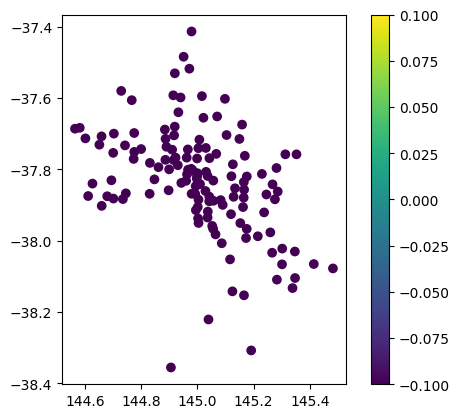

In [10]:
gdf.plot("area", legend=True)

In [11]:
gdf.explore("area", legend=False)